<a href="https://colab.research.google.com/github/arshambt/MachineLearning2023/blob/main/Final_exam/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 3:

1:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron , LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_covtype
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree

In [ ]:
X, y = fetch_covtype(return_X_y = True)
print(X.shape, y.shape)

# Count the number of samples in each class
unique, counts = np.unique(y, return_counts=True)
print("Class counts before balancing:", dict(zip(unique, counts)))

# Use RandomUnderSampler to balance the classes
rus = RandomUnderSampler(random_state=93)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Count the number of samples in each class after balancing
unique_resampled, counts_resampled = np.unique(y_resampled, return_counts=True)
print("Class counts after balancing:", dict(zip(unique_resampled, counts_resampled)))
print('\n')
print("New balanced dataset shape:", X_resampled.shape, y_resampled.shape)

(581012, 54) (581012,)
Class counts before balancing: {1: 211840, 2: 283301, 3: 35754, 4: 2747, 5: 9493, 6: 17367, 7: 20510}
Class counts after balancing: {1: 2747, 2: 2747, 3: 2747, 4: 2747, 5: 2747, 6: 2747, 7: 2747}


New balanced dataset shape: (19229, 54) (19229,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size =0.15, shuffle = True, random_state = 93)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

print(type(x_train))

(16344, 54) (2885, 54) (16344,) (2885,)
<class 'numpy.ndarray'>


In [ ]:
model = tree.DecisionTreeClassifier(max_depth = 3, random_state=93, ccp_alpha = 0.01)
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=3, random_state=93)

[Text(0.5555555555555556, 0.875, 'x[0] <= 2673.5\ngini = 0.857\nsamples = 16344\nvalue = [2299, 2293, 2357, 2357, 2360, 2343, 2335]'),
 Text(0.3333333333333333, 0.625, 'x[0] <= 2374.5\ngini = 0.708\nsamples = 7172\nvalue = [16, 238, 2193, 2357, 232, 2136, 0]'),
 Text(0.2222222222222222, 0.375, 'x[6] <= 195.5\ngini = 0.601\nsamples = 4130\nvalue = [0, 3, 1051, 2232, 0, 844, 0]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.633\nsamples = 1372\nvalue = [0, 3, 596, 251, 0, 522, 0]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.443\nsamples = 2758\nvalue = [0, 0, 455, 1981, 0, 322, 0]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.665\nsamples = 3042\nvalue = [16, 235, 1142, 125, 232, 1292, 0]'),
 Text(0.7777777777777778, 0.625, 'x[0] <= 3226.5\ngini = 0.768\nsamples = 9172\nvalue = [2283, 2055, 164, 0, 2128, 207, 2335]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 2948.5\ngini = 0.715\nsamples = 6240\nvalue = [1656, 1935, 164, 0, 2128, 207, 150]'),
 Text(0.5555555555555556, 0.125, 'gini = 0.6

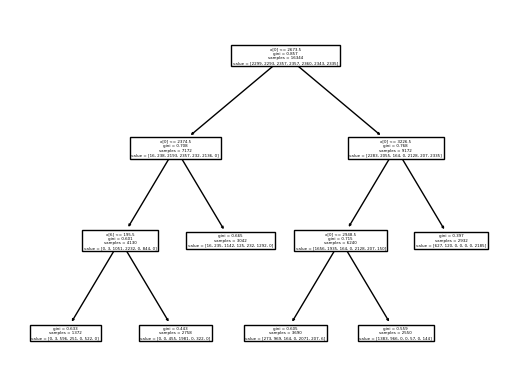

In [ ]:
tree.plot_tree(model)

In [ ]:
r = tree.export_text(model)
print(r)

|--- feature_0 <= 2673.50
|   |--- feature_0 <= 2374.50
|   |   |--- feature_6 <= 195.50
|   |   |   |--- class: 3
|   |   |--- feature_6 >  195.50
|   |   |   |--- class: 4
|   |--- feature_0 >  2374.50
|   |   |--- class: 6
|--- feature_0 >  2673.50
|   |--- feature_0 <= 3226.50
|   |   |--- feature_0 <= 2948.50
|   |   |   |--- class: 5
|   |   |--- feature_0 >  2948.50
|   |   |   |--- class: 1
|   |--- feature_0 >  3226.50
|   |   |--- class: 7



In [ ]:
y_pred = model.predict(x_test)

s1 = model.score(x_train, y_train)
s2 = model.score(x_test, y_test)
print(f"Train Accuracy: {s1}")
print(f"Test Accuracy: {s2}")

Train Accuracy: 0.5817425354870289
Test Accuracy: 0.5604852686308492


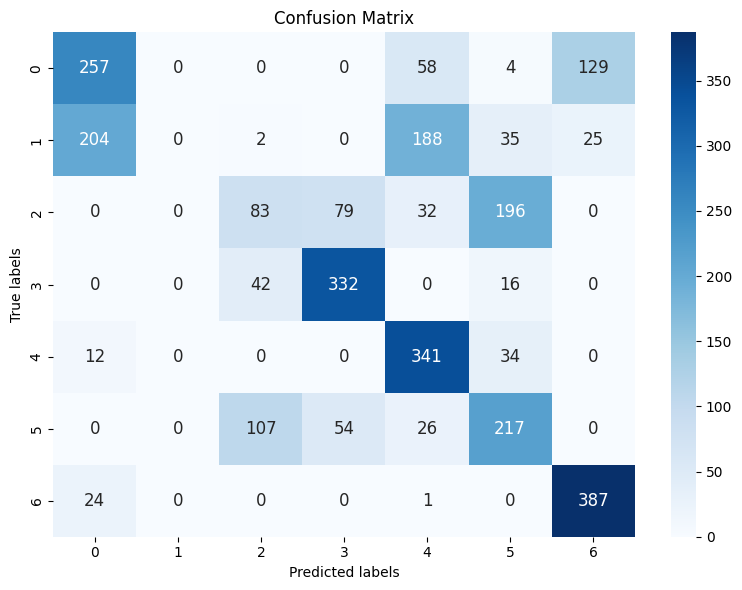

In [ ]:
import seaborn as sns

cf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

In [ ]:
c = model.n_classes_
n_c = model.tree_.node_count
n_l = model.tree_.n_leaves
n_s = model.tree_.n_node_samples

print(c)
print(n_c)
print(n_l)
print(n_s)

7
11
6
[16344  7172  4130  1372  2758  3042  9172  6240  3690  2550  2932]


**Model 2**

In [ ]:
model2 = tree.DecisionTreeClassifier(criterion = 'entropy' , max_depth = 6, random_state=93, ccp_alpha = 0.005)
model2.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.005, criterion='entropy', max_depth=6,
                       random_state=93)

[Text(0.5326704545454546, 0.9285714285714286, 'x[0] <= 2674.5\nentropy = 2.807\nsamples = 16344\nvalue = [2299, 2293, 2357, 2357, 2360, 2343, 2335]'),
 Text(0.26704545454545453, 0.7857142857142857, 'x[0] <= 2392.5\nentropy = 1.916\nsamples = 7185\nvalue = [16, 241, 2196, 2357, 236, 2139, 0]'),
 Text(0.125, 0.6428571428571429, 'x[6] <= 195.5\nentropy = 1.483\nsamples = 4377\nvalue = [0, 5, 1135, 2289, 0, 948, 0]'),
 Text(0.045454545454545456, 0.5, 'x[3] <= 15.0\nentropy = 1.514\nsamples = 1458\nvalue = [0, 4, 630, 252, 0, 572, 0]'),
 Text(0.022727272727272728, 0.35714285714285715, 'entropy = 0.769\nsamples = 144\nvalue = [0, 1, 7, 123, 0, 13, 0]'),
 Text(0.06818181818181818, 0.35714285714285715, 'x[23] <= 0.5\nentropy = 1.384\nsamples = 1314\nvalue = [0, 3, 623, 129, 0, 559, 0]'),
 Text(0.045454545454545456, 0.21428571428571427, 'x[5] <= 690.5\nentropy = 1.565\nsamples = 461\nvalue = [0, 0, 164, 119, 0, 178, 0]'),
 Text(0.022727272727272728, 0.07142857142857142, 'entropy = 1.124\nsample

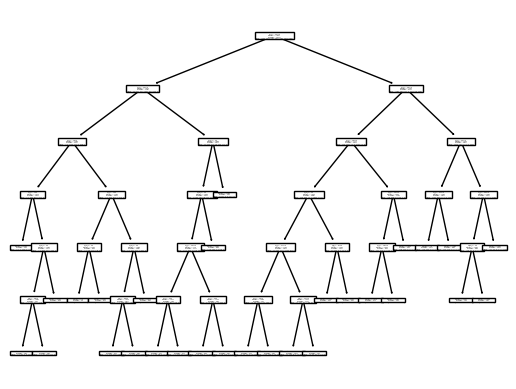

In [ ]:
tree.plot_tree(model2)

In [ ]:
r = tree.export_text(model2)
print(r)

|--- feature_0 <= 2674.50
|   |--- feature_0 <= 2392.50
|   |   |--- feature_6 <= 195.50
|   |   |   |--- feature_3 <= 15.00
|   |   |   |   |--- class: 4
|   |   |   |--- feature_3 >  15.00
|   |   |   |   |--- feature_23 <= 0.50
|   |   |   |   |   |--- feature_5 <= 690.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_5 >  690.50
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_23 >  0.50
|   |   |   |   |   |--- class: 3
|   |   |--- feature_6 >  195.50
|   |   |   |--- feature_3 <= 15.00
|   |   |   |   |--- feature_13 <= 0.50
|   |   |   |   |   |--- class: 6
|   |   |   |   |--- feature_13 >  0.50
|   |   |   |   |   |--- class: 4
|   |   |   |--- feature_3 >  15.00
|   |   |   |   |--- feature_16 <= 0.50
|   |   |   |   |   |--- feature_5 <= 808.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_5 >  808.50
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_16 >  0.50
|   |   |   |   |   |--- class

In [ ]:
y_pred2 = model2.predict(x_test)

s1_2 = model2.score(x_train, y_train)
s2_2 = model2.score(x_test, y_test)
print(f"Train Accuracy: {s1_2}")
print(f"Test Accuracy: {s2_2}")

Train Accuracy: 0.6666054821341165
Test Accuracy: 0.6533795493934142


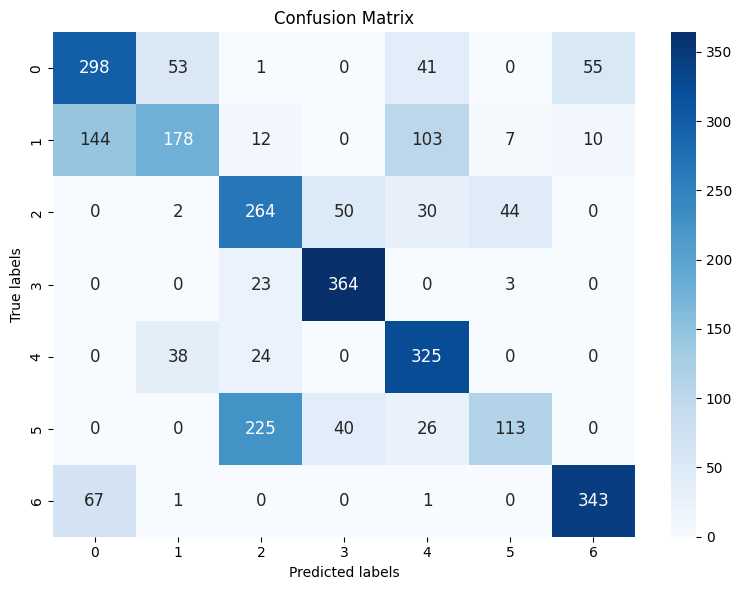

In [ ]:
import seaborn as sns

cf_matrix = confusion_matrix(y_test, y_pred2)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

In [ ]:
c = model2.n_classes_
n_c = model2.tree_.node_count
n_l = model2.tree_.n_leaves
n_s = model2.tree_.n_node_samples

print(c)
print(n_c)
print(n_l)
print(n_s)

7
57
29
[16344  7185  4377  1458   144  1314   461   195   266   853  2919   839
    23   816  2080  1200   611   589   880  2808  2579  1771   788   217
   571   983   603   380   808   229  9159  4268  3085  1854   721   416
   305  1133  1024   109  1231   664   567  1183   844   575   269   339
  4891  1959  1070   889  2932   883   703   180  2049]
